In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
plt.rc('font', family='Malgun Gothic')

In [6]:
tour_df = pd.read_excel('../DABA/숙소위치기반_교통_관광_통계정보의 사본.xlsx')

In [16]:
tour_df.info()
tour_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   이름                     1215 non-null   object 
 1   종류                     1215 non-null   object 
 2   평점                     1215 non-null   float64
 3   숙박가격                   1215 non-null   int64  
 4   도보시간                   1215 non-null   object 
 5   인기테그                   1215 non-null   object 
 6   별점 높은순 후기              1215 non-null   object 
 7   별점 낮은순 후기              1207 non-null   object 
 8   주소                     1215 non-null   object 
 9   객실수                    1197 non-null   object 
 10  총후기                    1215 non-null   int64  
 11  대실가격                   837 non-null    object 
 12  대실시간                   815 non-null    object 
 13  위도                     1215 non-null   float64
 14  경도                     1215 non-null   float64
 15  경쟁업소

Index(['이름', '종류', '평점', '숙박가격', '도보시간', '인기테그', '별점 높은순 후기', '별점 낮은순 후기',
       '주소', '객실수', '총후기', '대실가격', '대실시간', '위도', '경도', '경쟁업소_수(1km내)',
       '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)', '경쟁업소_평균거리(1km내)',
       '버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)',
       '지하철역_최단거리(1km내)', '지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)',
       '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)', '관광지_수(1km내)',
       '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)',
       '쇼핑몰_평균거리(1km내)'],
      dtype='object')

In [ ]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
iris = sns.load_dataset('iris')

iris.info()
g = sns.PairGrid(iris, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

In [37]:
# select = ['평점', '객실수', '대실가격', '대실시간', '경쟁업소_수(1km내)',
#        '경쟁업소_최단거리(1km내)', '경쟁업소_최장거리(1km내)', '경쟁업소_평균거리(1km내)',
#        '버스정류장_수(1km내)', '지하철역_수(1km내)', '버스정류장_최단거리(1km내)', '버스정류장_평균거리(1km내)',
#        '지하철역_최단거리(1km내)', '지하철역_평균거리(1km내)', '교통유동인구_월평균승차수(1km내)',
#        '교통유동인구_월평균하차수(1km내)', '교통유동인구_월평균승하차총계(1km내)', '관광지_수(1km내)',
#        '쇼핑몰_수(1km내)', '관광지_최단거리(1km내)', '관광지_평균거리(1km내)', '쇼핑몰_최단거리(1km내)',
#        '쇼핑몰_평균거리(1km내)']
select = ['평점', '경쟁업소_수(1km내)', '지하철역_수(1km내)', '교통유동인구_월평균승하차총계(1km내)','관광지_수(1km내)','쇼핑몰_수(1km내)' ]
tour_df_select = tour_df[select]
tour_df_select

,평점,경쟁업소_수(1km내),지하철역_수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내)
0,4.8,48,9,131529.95,6,6
1,4.7,8,3,86577.24,9,2
2,4.8,5,7,40616.42,3,3
3,4.3,10,2,101307.08,9,3
4,4.7,10,3,46413.18,15,7
...,...,...,...,...,...,...
1210,4.8,89,8,158479.84,14,3
1211,3.6,61,6,80350.82,24,8
1212,4.0,8,1,15423.81,2,2
1213,5.0,78,7,149081.91,23,4


In [38]:
tour_df_select_dropna = tour_df_select.dropna()
tour_df_select_dropna

,평점,경쟁업소_수(1km내),지하철역_수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내)
0,4.8,48,9,131529.95,6,6
1,4.7,8,3,86577.24,9,2
2,4.8,5,7,40616.42,3,3
3,4.3,10,2,101307.08,9,3
4,4.7,10,3,46413.18,15,7
...,...,...,...,...,...,...
1210,4.8,89,8,158479.84,14,3
1211,3.6,61,6,80350.82,24,8
1212,4.0,8,1,15423.81,2,2
1213,5.0,78,7,149081.91,23,4


c:\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51137 (\N{HANGUL SYLLABLE JAENG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE S

c:\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  func(*args, **kwargs)
c:\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51137 (\N{HANGUL SYLLABLE JAENG}) missing from current font.
  func(*args, **kwargs)
c:\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*args, **kwargs)
c:\Python38\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
c:\Python38\lib\site-packages\IPython\

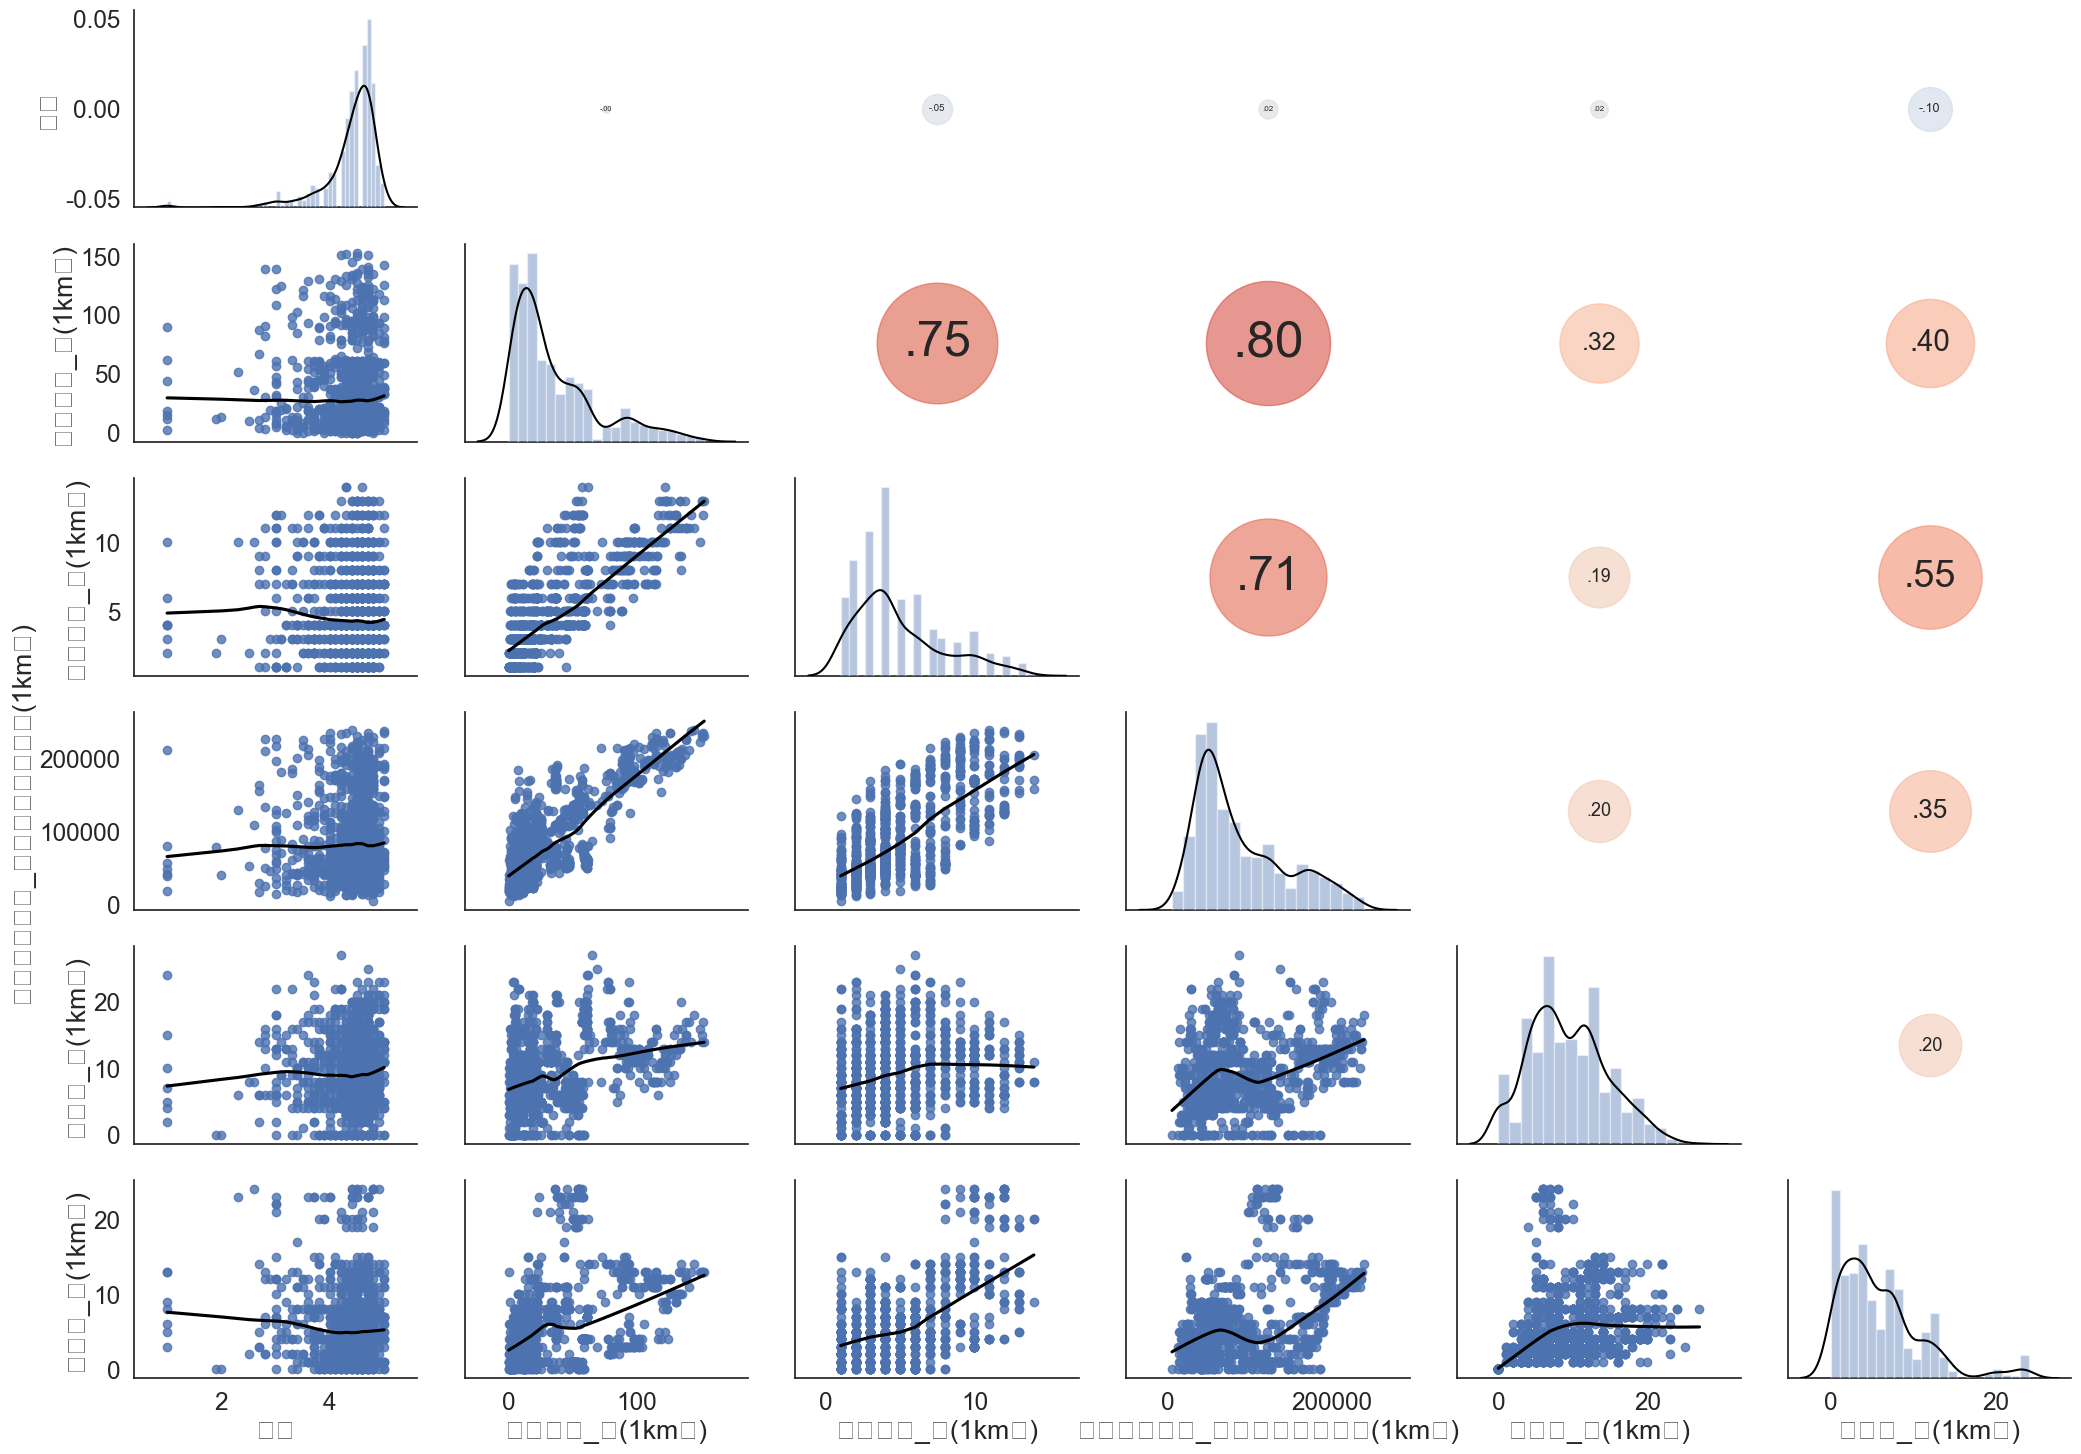

In [41]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(tour_df_select_dropna, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)